In [ ]:
!pip3 install openmim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 6.3 MB/s 
     |████████████████████████████████| 235 kB 63.9 MB/s 
     |████████████████████████████████| 51 kB 7.7 MB/s 


In [ ]:
!mim install mmcv-full

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html
     |████████████████████████████████| 40.6 MB 1.3 MB/s 
     |████████████████████████████████| 190 kB 33.6 MB/s 


In [ ]:
!git clone https://github.com/open-mmlab/mmsegmentation.git
%cd mmsegmentation
!pip install -e .

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 10467, done.
remote: Counting objects: 100% (342/342), done.
remote: Compressing objects: 100% (222/222), done.
remote: Total 10467 (delta 151), reused 266 (delta 118), pack-reused 10125
Receiving objects: 100% (10467/10467), 14.17 MiB | 19.06 MiB/s, done.
Resolving deltas: 100% (7594/7594), done.
/content/mmsegmentation
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmsegmentation
     |████████████████████████████████| 578 kB 32.6 MB/s 
  Running setup.py develop for mmsegmentation


In [ ]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

1.12.0+cu113 True
0.27.0


In [ ]:
!mkdir checkpoints
!wget https://download.openmmlab.com/mmsegmentation/v0.5/knet/knet_s3_fcn_r50-d8_8x2_512x512_adamw_80k_ade20k/knet_s3_fcn_r50-d8_8x2_512x512_adamw_80k_ade20k_20220228_043751-abcab920.pth -P checkpoints

--2022-08-10 21:07:46--  https://download.openmmlab.com/mmsegmentation/v0.5/knet/knet_s3_fcn_r50-d8_8x2_512x512_adamw_80k_ade20k/knet_s3_fcn_r50-d8_8x2_512x512_adamw_80k_ade20k_20220228_043751-abcab920.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 161.117.242.73
Connecting to download.openmmlab.com (download.openmmlab.com)|161.117.242.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251671074 (240M) [application/octet-stream]
Saving to: ‘checkpoints/knet_s3_fcn_r50-d8_8x2_512x512_adamw_80k_ade20k_20220228_043751-abcab920.pth’

knet_s3_fcn_r50-d8_ 100%[===================>] 240.01M  13.2MB/s    in 17s     

2022-08-10 21:08:04 (14.0 MB/s) - ‘checkpoints/knet_s3_fcn_r50-d8_8x2_512x512_adamw_80k_ade20k_20220228_043751-abcab920.pth’ saved [251671074/251671074]



In [ ]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

In [ ]:

config_file = 'configs/knet/knet_s3_fcn_r50-d8_8x2_512x512_adamw_80k_ade20k.py'
checkpoint_file = 'checkpoints/knet_s3_fcn_r50-d8_8x2_512x512_adamw_80k_ade20k_20220228_043751-abcab920.pth'

In [ ]:
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:236: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore`` is False, if you would like to '


load checkpoint from local path: checkpoints/knet_s3_fcn_r50-d8_8x2_512x512_adamw_80k_ade20k_20220228_043751-abcab920.pth


In [ ]:
# test a single image
img = 'demo/demo.png'
result = inference_segmentor(model, img)

/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


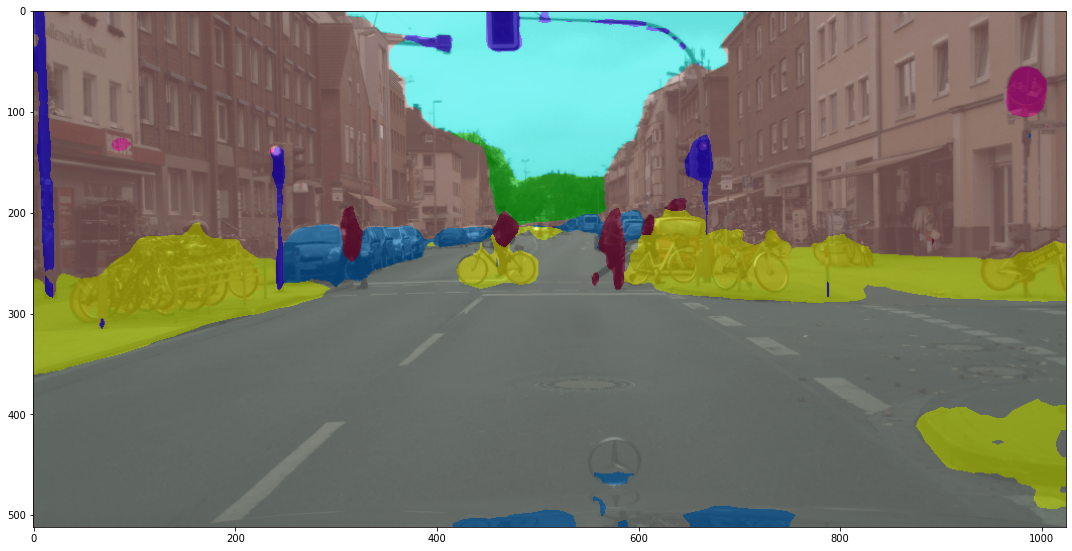

In [ ]:
# show the results
show_result_pyplot(model, img, result)